# CS2 Inferno Update

Update the inferno map to include Z coordinates as well

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from awpy import Demo
import plotly.graph_objs as go

In [47]:
nodes = pd.read_csv('../../../data/map_graph_model/de_inferno/nodes.csv')
edges = pd.read_csv('../../../data/map_graph_model/de_inferno/edges.csv')

In [3]:
files = [
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-astralis-vs-virtuspro-bo3-MPKVFectLYZpY_brKJhH1sastralis-vs-virtus-pro-m1-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-faze-vs-saw-bo3-ESSTYxFkvaG2Ij-q_tbYfkfaze-vs-saw-m2-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-faze-vs-vitality-bo3-lQLvdLlJcL7dI4fNDLSZOXfaze-vs-vitality-m1-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-saw-vs-astralis-bo3-CVFySu5vH0SDxuYWfQA4dZsaw-vs-astralis-m2-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-vitality-vs-g2-bo3-07R4CPOHu_IwXUW--CcGcfvitality-vs-g2-m1-inferno.dem',
]

pos = None

for idx, file in enumerate(files):
    if idx == 0:
        pos = Demo(file).ticks[['X', 'Y', 'Z']]
        pos.round(0)
        pos = pos.drop_duplicates()
    else:
        pos = pd.concat([pos, Demo(file).ticks[['X', 'Y', 'Z']]])
        pos.round(0)
        pos = pos.drop_duplicates()
    print(f'Processed {file}')
        

Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-astralis-vs-virtuspro-bo3-MPKVFectLYZpY_brKJhH1sastralis-vs-virtus-pro-m1-inferno.dem
Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-faze-vs-saw-bo3-ESSTYxFkvaG2Ij-q_tbYfkfaze-vs-saw-m2-inferno.dem
Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-faze-vs-vitality-bo3-lQLvdLlJcL7dI4fNDLSZOXfaze-vs-vitality-m1-inferno.dem
Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-saw-vs-astralis-bo3-CVFySu5vH0SDxuYWfQA4dZsaw-vs-astralis-m2-inferno.dem
Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-vitality-vs-g2-bo3-07R4CPOHu_IwXUW--CcGcfvitality-vs-g2-m1-inferno.dem


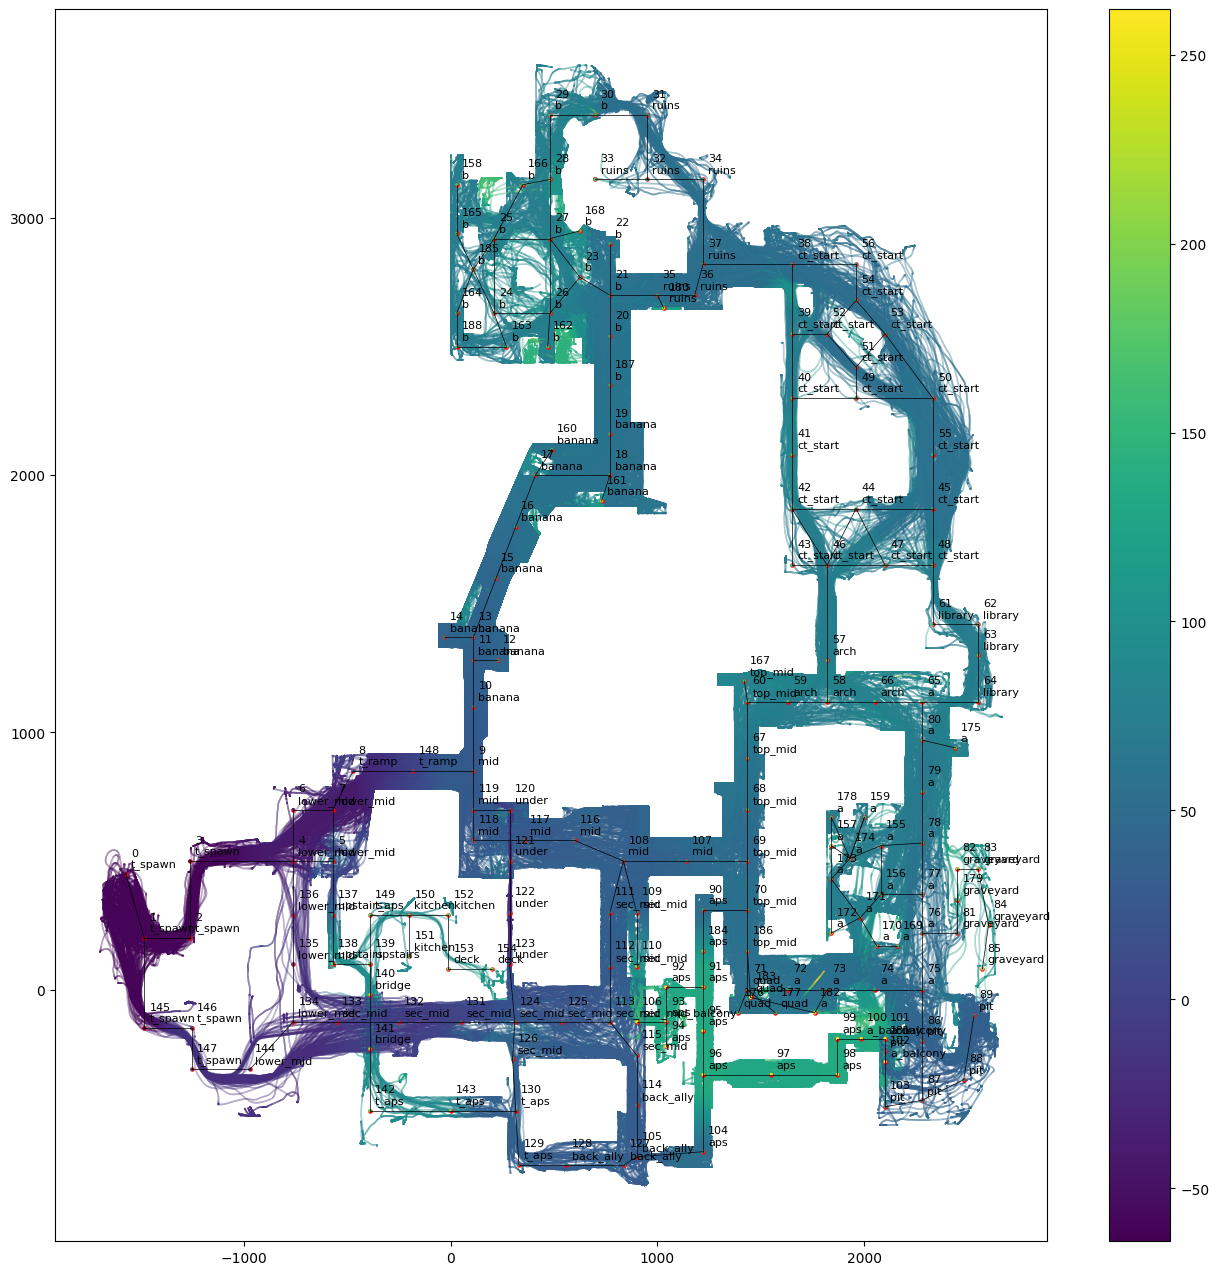

In [32]:
fig = plt.figure(figsize=(16, 16))
plt.scatter(pos.drop_duplicates()['X'], pos.drop_duplicates()['Y'], s=0.01, c=pos.drop_duplicates()['Z'])
plt.scatter(nodes['x'], nodes['y'], s=5, c='red')
plt.scatter(nodes['x'], nodes['y'], s=2, c=nodes['z'])
# Add annotations to the nodes (node id)
for idx, row in nodes.iterrows():
    plt.annotate(str(row['node_id']) + '\n' + row['pos_name'] , (row['x']+25, row['y']+25), fontsize=8)
for edge in edges.iterrows():
    src = nodes[nodes['node_id'] == edge[1]['source']]
    tgt = nodes[nodes['node_id'] == edge[1]['target']]
    plt.plot([src['x'], tgt['x']], [src['y'], tgt['y']], c='black', linewidth=0.5)
plt.colorbar()

In [30]:
nodes = pd.read_csv('../../../data/map_graph_model/de_inferno/nodes.csv')
edges = pd.read_csv('../../../data/map_graph_model/de_inferno/edges.csv')

# Csomópontok koordinátái
x_nodes = nodes['x']
y_nodes = nodes['y']
z_nodes = nodes['z'] / 10

# 3D scatter plot a csomópontoknak
scatter_nodes = go.Scatter3d(
    x=x_nodes,
    y=y_nodes,
    z=z_nodes,
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
)

# Az élek ábrázolása
edge_x = []
edge_y = []
edge_z = []

for _, edge in edges.iterrows():
    source_node = nodes.loc[nodes['nodeId'] == edge['source']]
    target_node = nodes.loc[nodes['nodeId'] == edge['target']]
    
    edge_x.extend([source_node['x'].values[0], target_node['x'].values[0], None])
    edge_y.extend([source_node['y'].values[0], target_node['y'].values[0], None])
    edge_z.extend([source_node['z'].values[0]/10, target_node['z'].values[0]/10, None])

edge_trace = go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    mode='lines',
    line=dict(color='black', width=2)
)

# Gráf ábrázolása
fig = go.Figure(data=[scatter_nodes, edge_trace])

# Ábrázolási beállítások
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))

# Set Z axis range
fig.update_scenes(zaxis_range=[-100, 100])

# Gráf megjelenítése
fig.show()
